# Procesamiento en el dominio epacial
###Ezequiel Vijande
###Lucero Guadalupe Fernandez

## Librerias importadas

In [1]:
%pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6d406e9b2493f537eb5f3fcf447a7ab4dcb48d6d6e609f5a9cfba53c6cc2f8e4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import wget

## 1– Explicar que diferencia hay entre el brillo y contraste. Mostrar ejemplos.

El brillo de una imagen hace referencia al valor medio de la intensidad de la misma. Mientras que el contraste se refiere a la diferencia entre el vlor maximo y el valor minimo en la imagen, por lo que hace referencia al rango dinamimco de la misma.

In [3]:
cell_file = wget.download("https://tinyurl.com/y6qr6ozt")

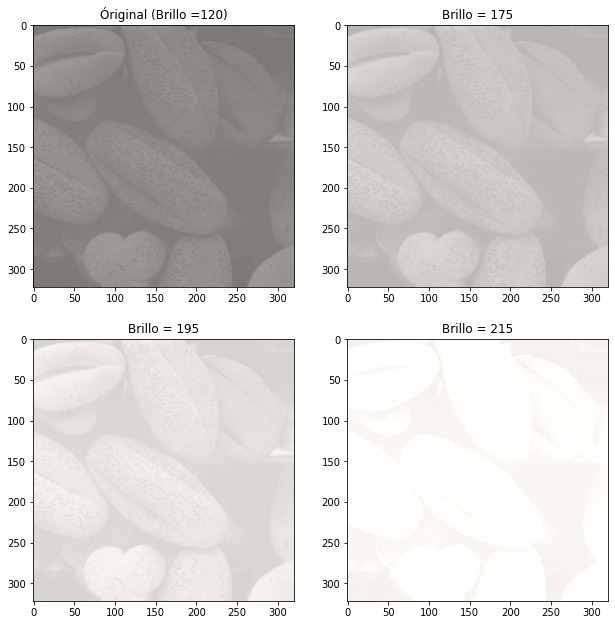


El codigo anterior muestra la imagen de una celula con distintos brillos.


In [4]:
def NegativeTransform(img):
  return 255-img
def LogTransform(img,L=256):
  c = (L-1)/np.log2(L)
  return  c*(np.log2(img)) 
def ChangeBrightnessAndContrast(img,desired_brightness=None, desired_contrast=None):
  float_img = img.astype(float)
  con_mod_img = float_img.copy()
  if (desired_contrast != None):
    contrast_factor = float( (259*(desired_contrast+255)) / (255 * (259 - desired_contrast)) )
    for i in range(0,3):
      con_mod_img   = (contrast_factor * (con_mod_img - 128) ) + 128
    con_mod_img[con_mod_img<0] = 0
    con_mod_img[con_mod_img>255] = 255
  if (desired_brightness != None):
    br_mod_img = con_mod_img + (desired_brightness - con_mod_img.mean())
  else:
    br_mod_img = con_mod_img
  result = br_mod_img.astype(int)
  result[result<0] = 0
  result[result>255] = 255
  return result
  

#Original
img = cv2.imread(cell_file)
fig_img = plt.figure(figsize=(8,8))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
fig_img.add_subplot(2,2,1)
plt.title('Óriginal (Brillo =120)')
plt.imshow(img)

initial_brightness = img.mean()
for i in range(2,5):
  fig_img.add_subplot(2,2,i)
  plt.title('Brillo = ' + str(int(initial_brightness + i*20)))
  plt.imshow( ChangeBrightnessAndContrast(img,desired_brightness=initial_brightness + i*30) )



plt.show()
print("\nEl codigo anterior muestra la imagen de una celula con distintos brillos.")


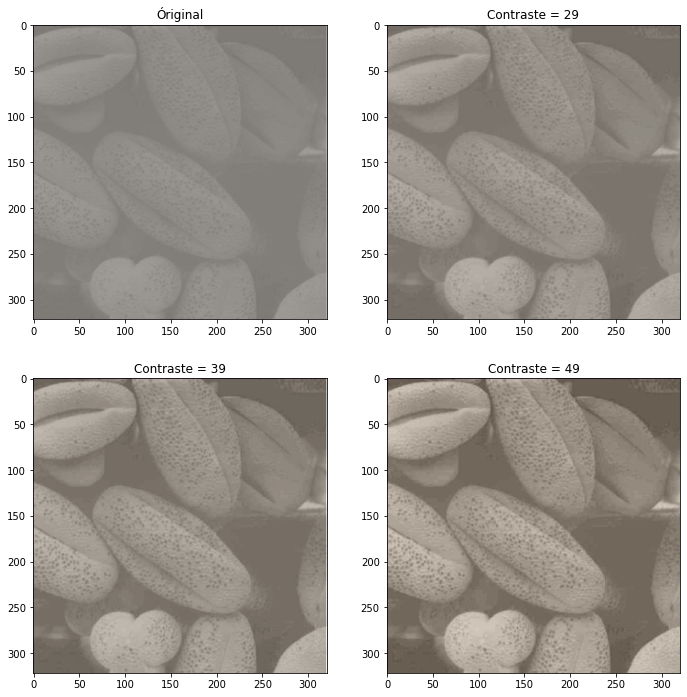

En este caso se aplica una transformacion logaritmica sobre la imagen.
La misma expande a un rango mayor los valores mas oscuros y comprime a un rango menor los mas brillantes.
Esta transformacion aumenta el brillo de la imagen y tambien disminuye el contraste de a misma


In [5]:
#Original
fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
fig_img.add_subplot(221)
plt.title('Óriginal')
plt.imshow(img)

initial_contrast = img.std()
for i in range(2,5):
  fig_img.add_subplot(2,2,i)
  plt.title('Contraste = ' + str(int(initial_contrast + i*10)))
  plt.imshow( ChangeBrightnessAndContrast(img,desired_brightness=initial_brightness, desired_contrast= initial_contrast + i*10) )

plt.show()
print("En este caso se aplica una transformacion logaritmica sobre la imagen.")
print("La misma expande a un rango mayor los valores mas oscuros y comprime a un rango menor los mas brillantes.")
print("Esta transformacion aumenta el brillo de la imagen y tambien disminuye el contraste de a misma")

## 2 – Escribir un código que modifique el brillo y contraste de una imagen

In [22]:
def PlotChangeInContrastAndBrigthness(img):
  initial_contrast = img.std() -5
  initial_brightness = img.mean() - 30
  fig_img = plt.figure(figsize=(9,9))
  plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
  for i in range(0,9):
    if (i<3):
      fig_img.add_subplot(3,3,i+1)
      plt.title('Brillo = '+str(int(initial_brightness))+' Contraste = ' + str(int(initial_contrast + i*30)))
      plt.imshow( ChangeBrightnessAndContrast(img,desired_brightness=initial_brightness, desired_contrast= initial_contrast + i*50) )
    elif ( i<6 ):
      fig_img.add_subplot(3,3,i+1)
      plt.title('Brillo = '+str(int(initial_brightness+(i-3)*30))+' Contraste = ' + str(int(initial_contrast)))
      plt.imshow( ChangeBrightnessAndContrast(img,initial_brightness+(i-3)*50 ))
    else:
      fig_img.add_subplot(3,3,i+1)
      plt.title('Brillo = '+str(int(initial_brightness+(i-6)*30))+' Contraste = ' + str(int(initial_contrast+(i-6)*30)))
      plt.imshow( ChangeBrightnessAndContrast(img,initial_brightness+(i-6)*50, desired_contrast= initial_contrast + (i-6)*50))
  plt.show()


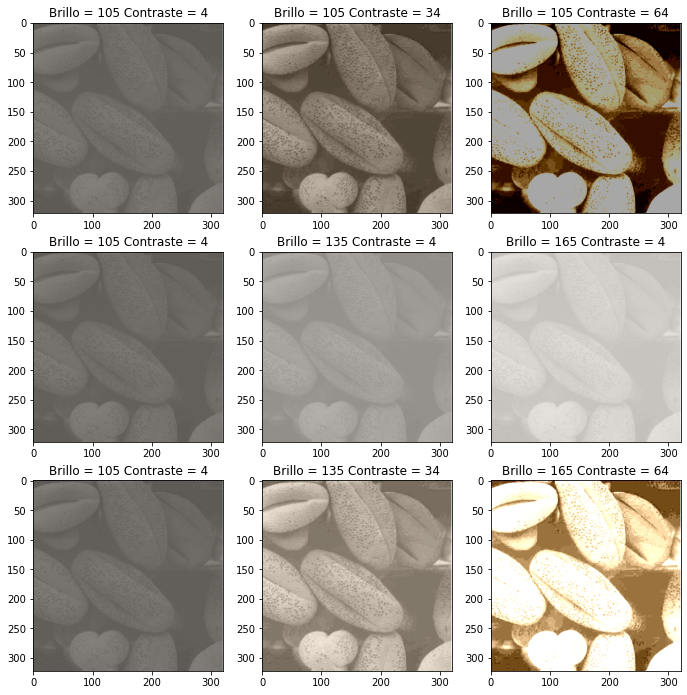

In [23]:
PlotChangeInContrastAndBrigthness(img)

## 3 - Explicar que es un histograma de una imagen . Escribir un código para calcularlo

El histograma de una idea de la distribucion de intensidades en una imagen. Subdivide el rango de intensidades de la imagen en "bins" y muestra el numero de pixels dentro de cada bin. Por lo que junta cada pixel en su bin correspondiente dependiendo de su intensidad y muestra el numero de pixels en cada bin, lo que equivale a mostrar el nuumero de pixels que tiene un rango de intensidad dado.

In [62]:
def GetImageHistogram(img,n_bins, norm= False):
  hist = np.zeros(n_bins)
  bin_hop = 255 // n_bins
  for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
      index = img[i][j][0] // bin_hop
      hist[index-1] = hist[index-1] + 1
  if norm:
    hist = hist / (img.shape[0] * img.shape[1])
  return hist

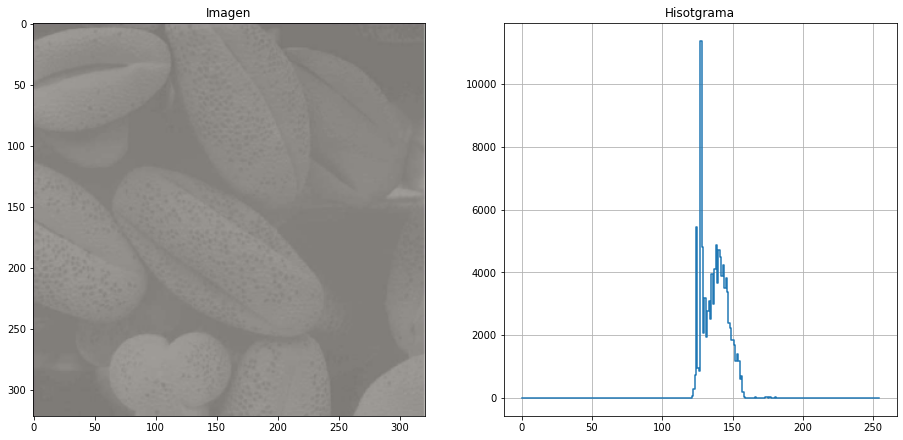

En el histograma de la imagen se puede ver claramente el gran numero de pixels que

caen en el rango de 110-150 de intensidad, por lo que viendo el histograma ya se puede concluir

que se trata de una imagen donde prevalece fuertemente el gris y que tiene muy bajo contraste,

ya que tambien se ve que la cantidad de pixels por arriba de 150 y por debajo de 100 parece despreciable


In [63]:
n_bins = 255
hist = GetImageHistogram(img,n_bins)

fig_img = plt.figure(figsize=(12,12))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
#Imagen
fig_img.add_subplot(2,2,1)
plt.title('Imagen')
plt.imshow(img)
#Histograma
fig_img.add_subplot(2,2,2)
plt.title('Hisotgrama')
plt.step(list(range(0,n_bins,1)),hist)
plt.grid(True)

plt.show()
print("En el histograma de la imagen se puede ver claramente el gran numero de pixels que\n")
print("caen en el rango de 110-150 de intensidad, por lo que viendo el histograma ya se puede concluir\n")
print("que se trata de una imagen donde prevalece fuertemente el gris y que tiene muy bajo contraste,\n")
print("ya que tambien se ve que la cantidad de pixels por arriba de 150 y por debajo de 100 parece despreciable")

## 4 - Para que se usa la ecualización de un histograma ? . Dar ejemplos

La ecualizacion de un histograma se utiliza para aumentar el contraste de una imagen, dado que busca modificar el histograma para redistribuir los bins de forma tal que se utilizen todos los bins lo maximo posible.

La transformacion utilizada para realizar la ecualizacion del histograma resulta en que la imagen final tiene una distribucion de probabilidad lo mas uniforme posible, por lo que todos los bins tienden a un numero similar de pixels.

In [64]:
def EqualizeImage(img, n_bins=255):
  pdf = GetImageHistogram(img,n_bins, norm= True)
  equalized_img = img.copy()
  bin_hop = 255 // n_bins
  for row in range(0,img.shape[0]):
    for col in range(0,img.shape[1]):
      for i in range(0,3):
        index = img[row][col][i] // bin_hop
        pixel = (pdf.cumsum())[index]
        equalized_img[row][col][i] = 255*pixel
  return equalized_img.astype(int)

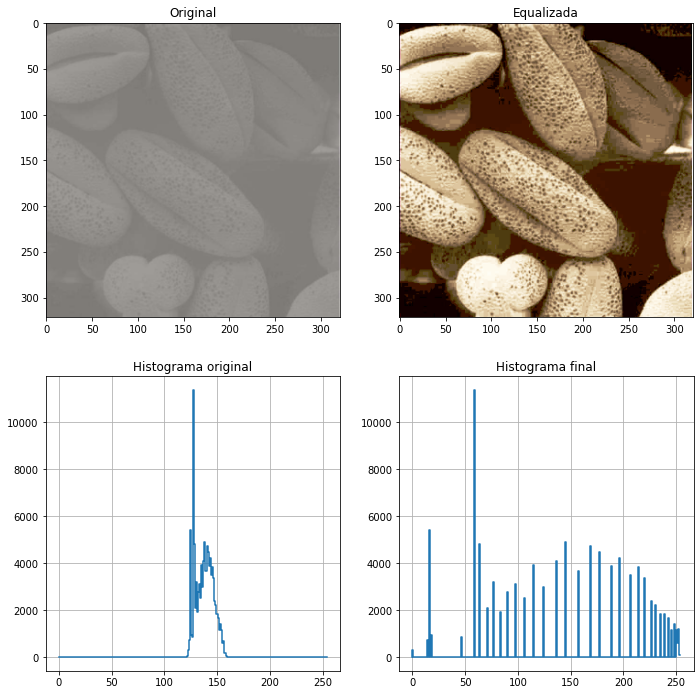

In [65]:
equalized = EqualizeImage(img)

fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)

#Original
fig_img.add_subplot(2,2,1)
plt.title('Original')
plt.imshow( img )

#Equalizada
fig_img.add_subplot(2,2,2)
plt.title('Equalizada')
plt.imshow( equalized )

#Histograma original
fig_img.add_subplot(2,2,3)
plt.title('Histograma original')
plt.step(list(range(0,255,1)), GetImageHistogram(img,n_bins=255))
plt.grid(True)

#Histograma original
fig_img.add_subplot(2,2,4)
plt.title('Histograma final')
plt.step(list(range(0,255,1)), GetImageHistogram(equalized,n_bins=255))
plt.grid(True)

plt.show()

## 5 – Dada la siguiente imagen aplicarle bit plane slicing mostrar los resultados y reconstruir la imagen usando los planos 8-7-6-5-1 . Experimentar con diferentes planos

In [ ]:
def GammaTransform(img,gamma=1,L=256):
  gamma_f = float(gamma)
  c= (L-1)**(1-gamma_f)
  return (c*(img**gamma_f)).astype(int)

In [ ]:
def PlotGammas(img, show=True):
  fig_img.add_subplot(nrows=1, ncols=4, index=1)
  plt.title('Original (gamma=1)')
  plt.imshow(img)
  for i in range(2,5):
    fig_img.add_subplot(nrows=1, ncols=4, index=1)
    gamma = 0.6/(2**(i-1))
  plt.title('Gamma='+str(gamma))
  plt.imshow(GammaTransform(img,gamma))

#Original
img2 = cv2.imread('Rodilla.PNG')
fig_img = plt.figure(figsize=(9,9))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)
PlotGammas()
fig_img.add_subplot(121)
plt.title('Original')
plt.imshow(img2)

fig_img.add_subplot(122)
plt.title('Gamma')
plt.imshow(GammaTransform(img,gamma=3))

plt.show()

In [ ]:
#Original
img = cv2.imread('bit.jpeg')
fig_img = plt.figure(figsize=(7,7))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.2)


def bit_slicing_n(img, n):
  new_img = np.unpackbits(np.copy(img))
  new_img = np.reshape(new_img, (img.shape[0],img.shape[1],3,-1))
  print(np.shape(new_img))
  
  for i in range(img.shape[0]):
    print(new_img[new_img[1]])
    new_img[new_img[n] == 1] = 255
    new_img[new_img[n] == 0] = 0
    #new_img[np.logical_and(new_img > 2**n-1, new_img < 2**(n+1) )] = 255
    #new_img[((new_img > 2**n-1).all() and (new_img < 2**(n+1)).all())] = 255
  return np.packbits(new_img)

new_img = bit_slicing_n(img, 7)

fig_img.add_subplot(1,2,1)
plt.title("Original")
plt.axis('off')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

fig_img.add_subplot(1,2,2)
plt.title("bit slicing")
plt.axis('off')
plt.imshow(new_img, cmap='gray', vmin=0, vmax=255)

plt.show()